# K-Mean 觀察 : 使用輪廓分析

# [教學目標]
- 載入鳶尾花(iris)資料集, 以輪廓分析 (Silhouette analysis) 來觀察 K-mean 分群時不同 K 值的比較  
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以後續非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

In [1]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)
%matplotlib inline

In [2]:
# 載入 iris 資料集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

#### silhouette_score  算平均  
#### silhouette_samples 算個人分數
#### X:Array of pairwise distances between samples, or a feature array.
####  labels: Predicted labels for each sample.
<br><br>
The Silhouette Coefficient is calculated using the __mean__ intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b)

For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.4980505049972867
For n_clusters = 5 The average silhouette_score is : 0.4887488870931048
For n_clusters = 6 The average silhouette_score is : 0.3678464984712235
For n_clusters = 7 The average silhouette_score is : 0.3588294450965675
For n_clusters = 8 The average silhouette_score is : 0.34901133143367136


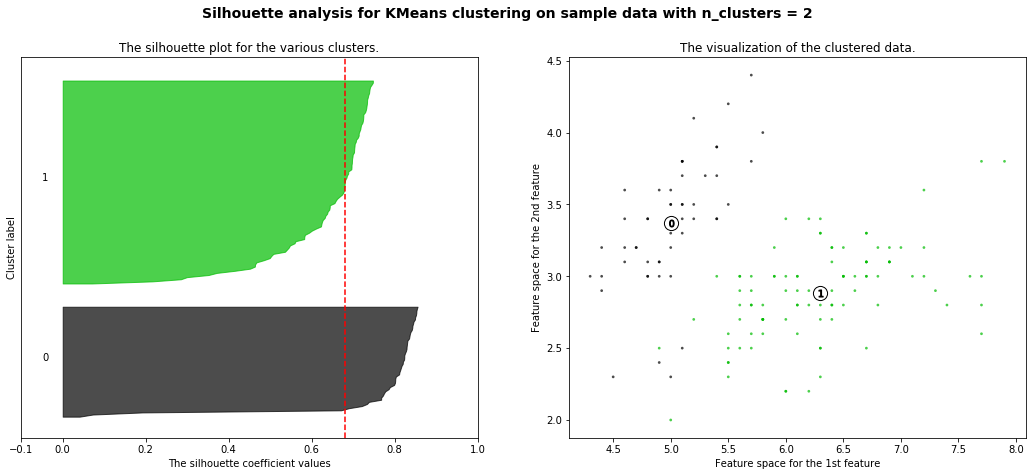

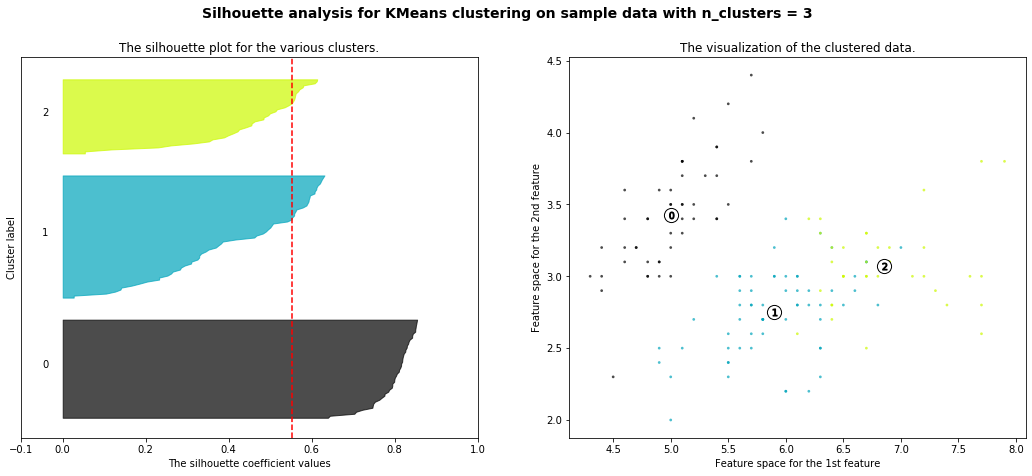

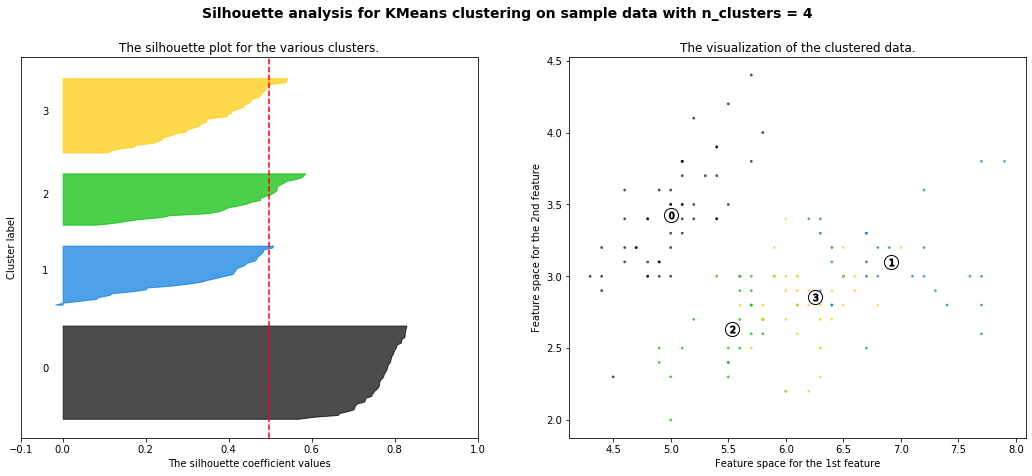

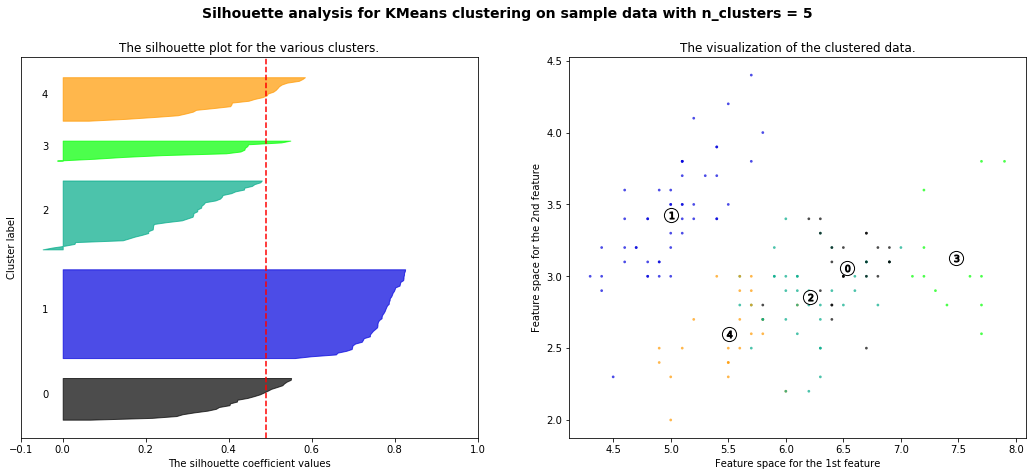

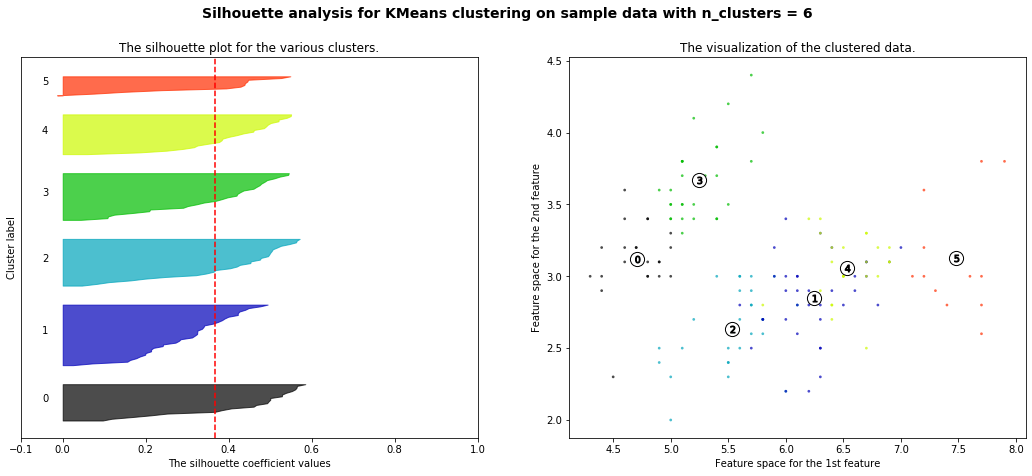

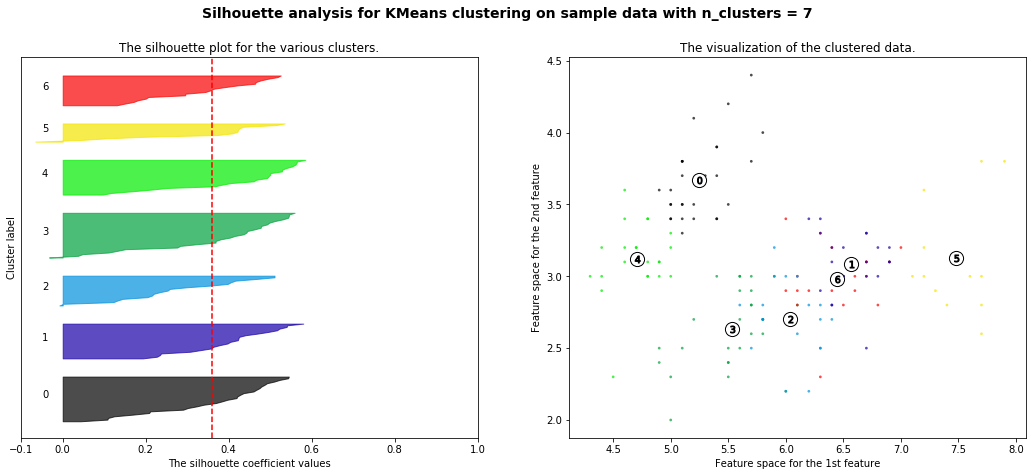

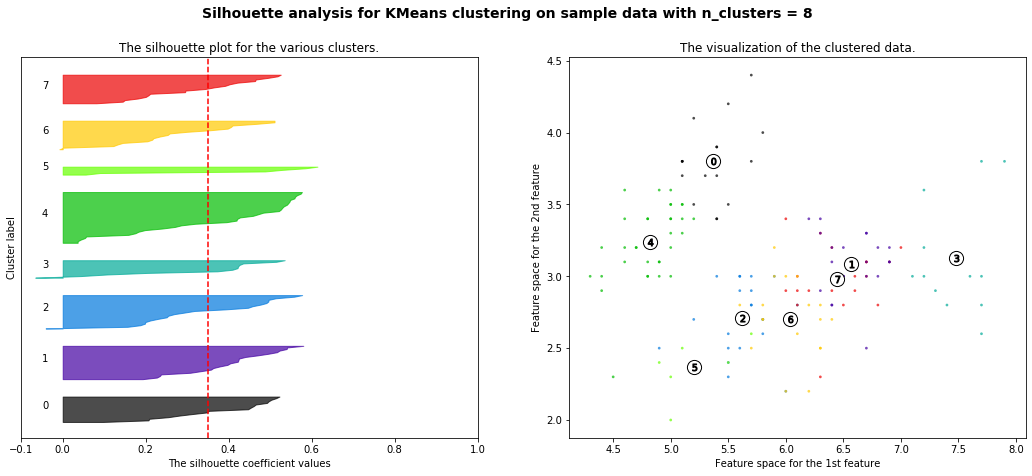

In [3]:
# 計算並繪製輪廓分析的結果
# 因下列為迴圈寫法, 無法再分拆為更小執行區塊, 請見諒
for n_clusters in range_n_clusters:
    # 設定小圖排版為 1 row 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 左圖為輪廓分析(Silhouette analysis), 雖然輪廓係數範圍在(-1,1)區間, 但範例中都為正值, 因此我們把顯示範圍定在(-0.1,1)之間
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 這部分是用來在不同輪廓圖間塞入空白, 讓圖形看起來更清楚
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # 宣告 KMean 分群器, 對 X 訓練並預測
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # 計算所有點的 silhouette_score 平均
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # 計算所有樣本的 The silhouette_score
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # 收集集群 i 樣本的輪廓分數，並對它們進行排序
        # 對每個樣本進行輪廓分數計算
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        
        #將色譜轉換成 數字範圍
        color = cm.nipy_spectral(float(i) / n_clusters)
        
        #曲線填充顏色
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # 在每個集群中間標上 i 的數值
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 計算下一個 y_lower 的位置
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 將 silhouette_score 平均所在位置, 畫上一條垂直線
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # 清空 y 軸的格線
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 右圖我們用來畫上每個樣本點的分群狀態, 從另一個角度觀察分群是否洽當
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    #只取兩個特徵 2D圖
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # 在右圖每一群的中心處, 畫上一個圓圈並標註對應的編號
    centers = clusterer.cluster_centers_
    
    #白色圈黑色框
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    #圈裡寫上數字
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# 分析結果解說 
* 觀察輸出值 : silhouette_score, 如果是一個適合的分群值, 應該要比下一個分群值的分數大很多
* 由結果可以看出 : 2, 3, 5 都是不錯的分群值(因為比 3, 4, 6的分數都高很多), 相形之下, 4, 6, 7 作為分群的效果就不明顯
<br><br>

* 看組與組織間分數的差距<br> 
2 -> 3  &emsp; 0.68 -> 0.55 = -0.13 &emsp; 2是好的分群值<br>
3 -> 4  &emsp; 0.55 -> 0.49 = -0.06 &emsp; 3是好的分群值<br>
4 -> 5  &emsp; 0.49 -> 0.48 = -0.01 &emsp; 4不是好的分群值<br>
5 -> 6  &emsp; 0.48 -> 0.36 = -0.12 &emsp; 5是好的分群值<br>

# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [4]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [5]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

For n_clusters = 2 The average silhouette_score is : 0.5027144446956527
For n_clusters = 3 The average silhouette_score is : 0.6105565451092732
For n_clusters = 4 The average silhouette_score is : 0.6270122040179333
For n_clusters = 5 The average silhouette_score is : 0.6115749260799671
For n_clusters = 6 The average silhouette_score is : 0.54977934041393
For n_clusters = 7 The average silhouette_score is : 0.47628595051844314
For n_clusters = 8 The average silhouette_score is : 0.4586150527766209


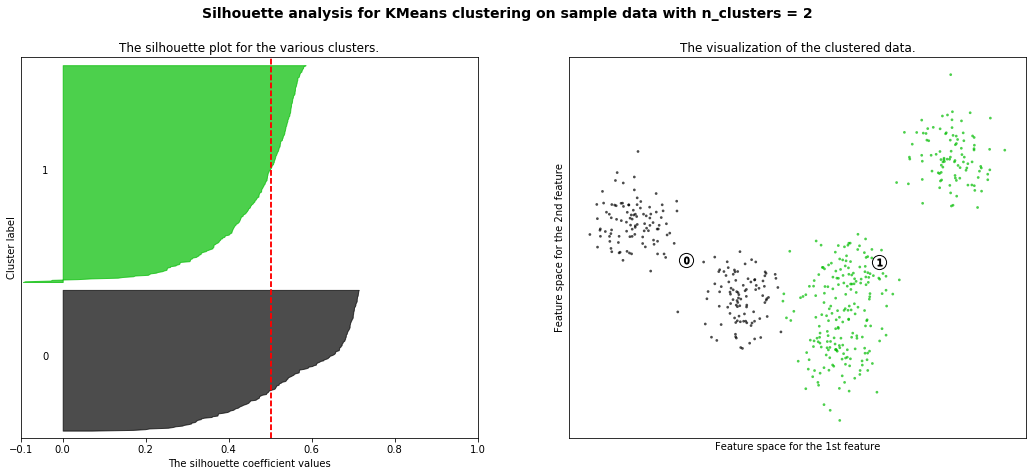

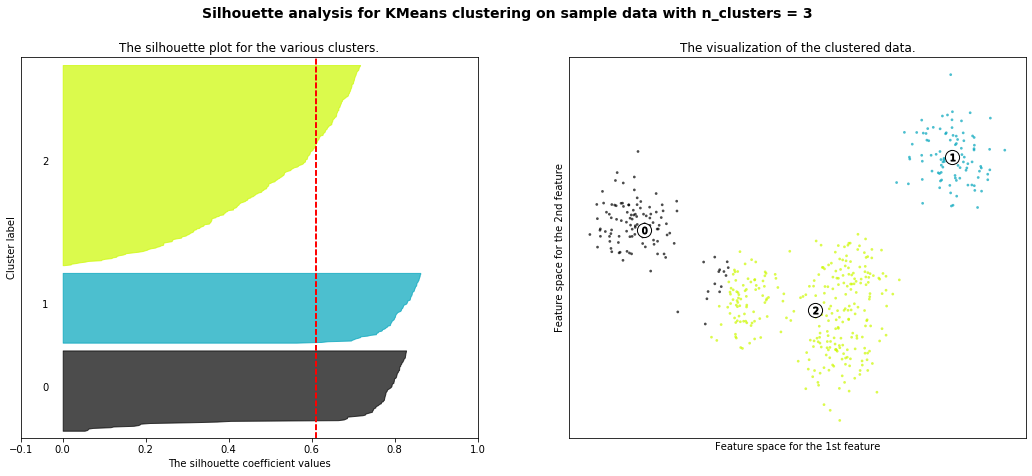

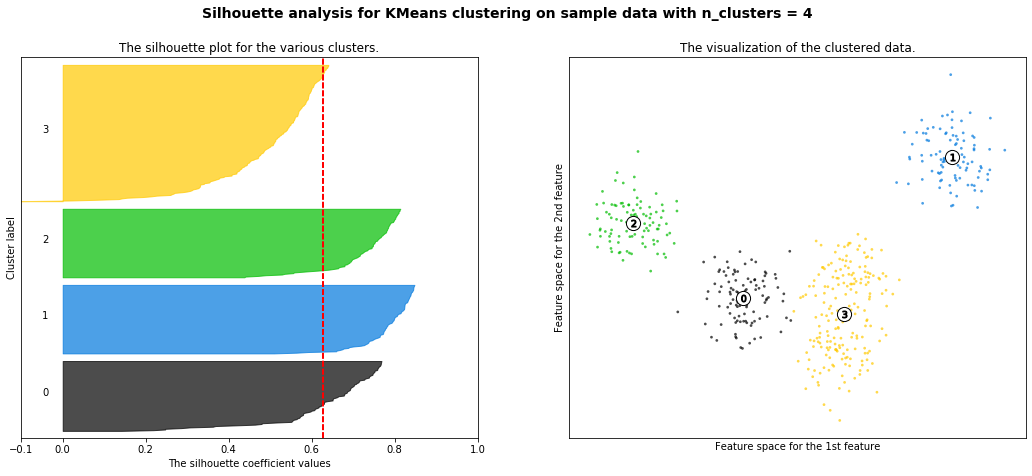

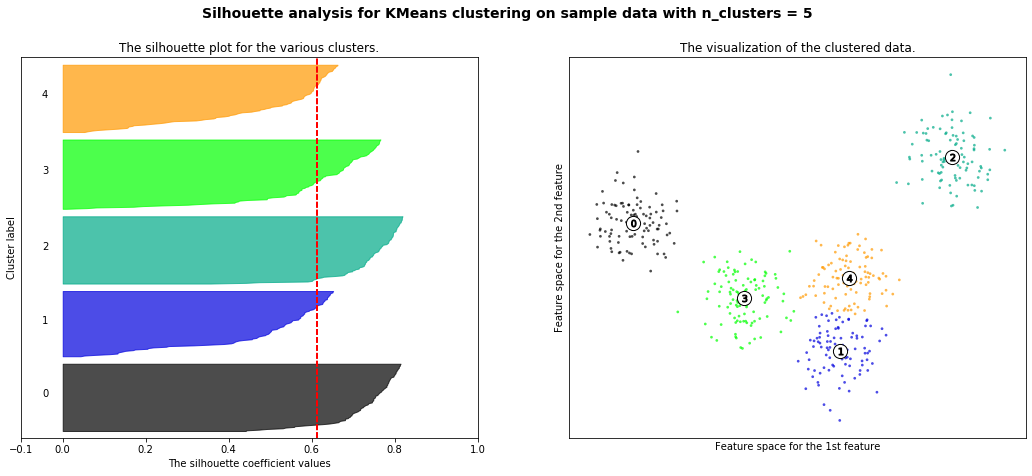

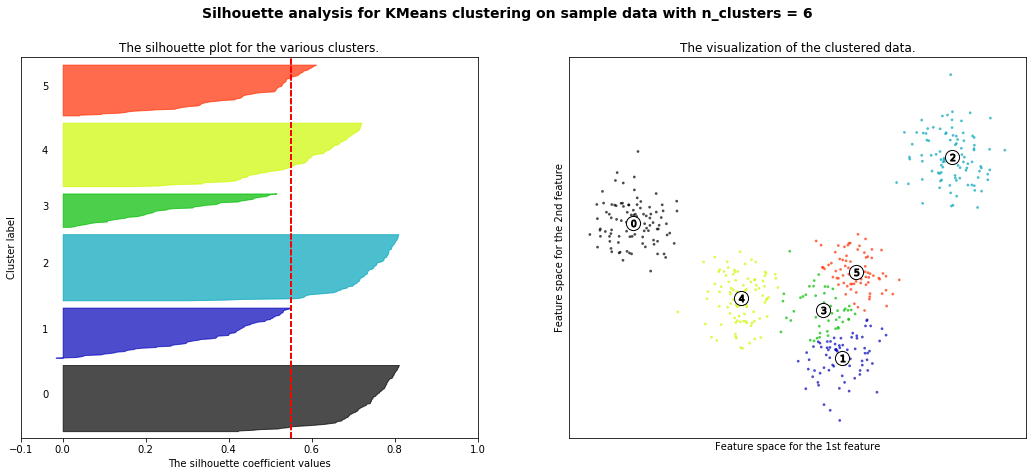

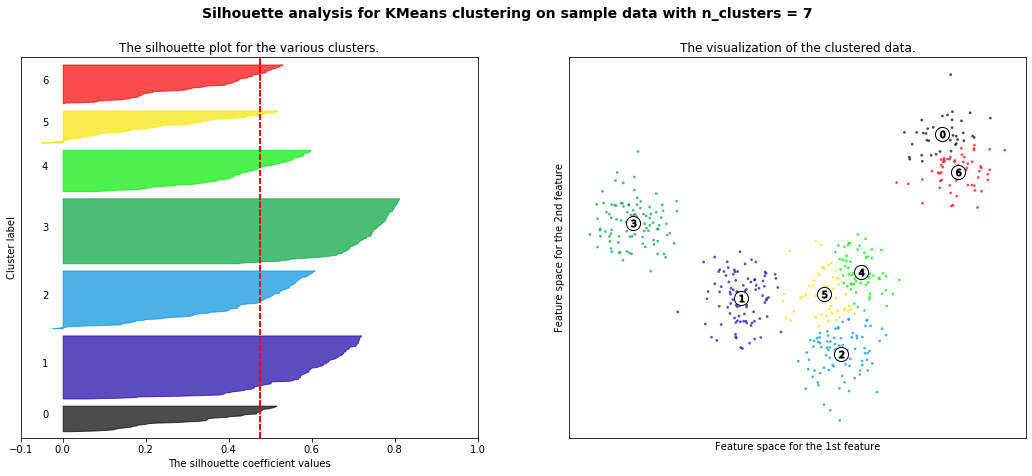

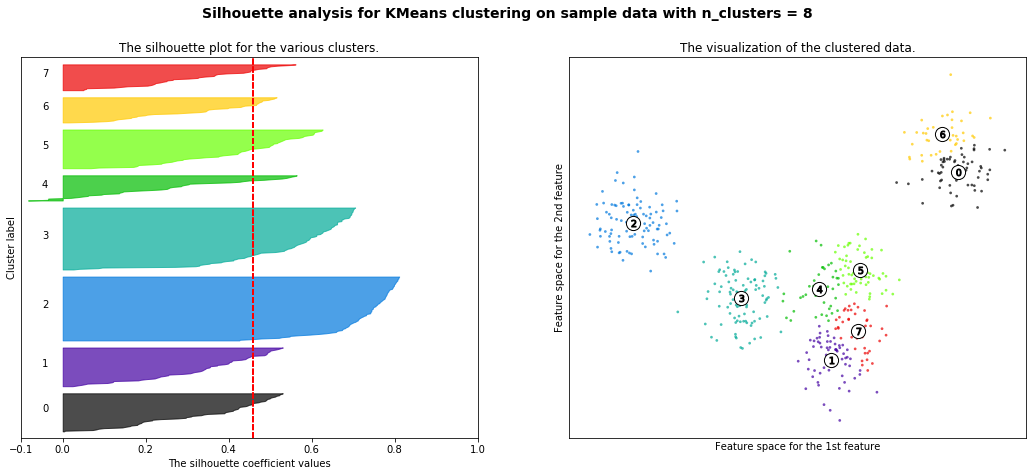

In [6]:
# 計算並繪製輪廓分析的結果
for n in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X)+ 10*(n+1)])
    
    cluster = KMeans(n_clusters=n, random_state=13)
    cluster_labels = cluster.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_score = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    
    for i in range(n):
        
        ith_sample_value = sample_score[cluster_labels==i]
        ith_sample_value.sort()
        
        size_cluster_i = ith_sample_value.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i)/n)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_sample_value, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        ax1.axvline(x=silhouette_avg, color='r', linestyle='--')
        
        y_lower = y_upper + 10
        
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        
        
               
    color = cm.nipy_spectral(cluster_labels.astype('float')/n)
    
    ax2.scatter(X[:,0], X[:,1], marker='.', s=30, lw=0, alpha=0.7, c=color, edgecolor='k')
    
    ax2.set_yticks([])
    ax2.set_xticks([])
    
    centroids = cluster.cluster_centers_
    
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')
    
    
    for i,c in enumerate(centroids):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
        
    
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n),
             fontsize=14, fontweight='bold')

# 分析結果 
* 由結果可以看出 : 4, 5, (6) 都是不錯的分群值;  2, 3感覺效果不明顯
<br><br>

* 看組與組織間分數的差距<br> 
2 -> 3  &emsp; 0.5 -> 0.61 = +0.11 &emsp; 分群值有問題(可以分成更多群集)<br>
3 -> 4  &emsp; 0.61 -> 0.62 = +0.01 &emsp; 分群值有問題(可以分成更多群集)<br>
4 -> 5  &emsp; 0.62 -> 0.61 = -0.01 &emsp; 4不是好的分群值(但圖形分布滿合理)<br>
5 -> 6  &emsp; 0.61 -> 0.54 = -0.07 &emsp; 5是好的分群值<br>
6 -> 7  &emsp; 0.54 -> 0.47 = -0.07 &emsp; 6是好的分群值<br>
7 -> 8  &emsp; 0.47 -> 0.56 = -0.02 &emsp; 7不是好的分群值<br>